# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  Group 13
Created by Kaulan Serzhanuly, Shruthi Raghavan, Haitham Assaf (018226910, )  
Last updated: 10/11/2025  
Briefly describe your dataset
# Brief Description:
# This dataset contains synthetic video game sales and streaming analytics data.
# It includes comprehensive game information, sales metrics, critic/user scores,
# and Twitch streaming statistics for 2,500 games across multiple platforms and genres.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load datasets
print("Loading datasets...")
vg_sales = pd.read_csv('https://raw.githubusercontent.com/KaulanSerzhanuly/CS-133-project/refs/heads/main/vg_sales_v1.csv?token=GHSAT0AAAAAADK3CSBSX36C7X2DQ5ITEI4I2HLIP6Q')
twitch_stats = pd.read_csv('https://raw.githubusercontent.com/KaulanSerzhanuly/CS-133-project/refs/heads/main/twitch_stats_v1.csv?token=GHSAT0AAAAAADLFOOOZ7ZMQBTZJPSNRFECK2HLIG7A')

# Merge datasets on Game column
merged_df = pd.merge(vg_sales, twitch_stats, on='Game', how='inner')

print(f"Original games: {len(vg_sales)}")
print(f"Twitch stats: {len(twitch_stats)}")
print(f"Merged dataset: {len(merged_df)}")
print("\nDataset loaded successfully!")


Loading datasets...
Original games: 2500
Twitch stats: 2500
Merged dataset: 3834

Dataset loaded successfully!


### Q1: Show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
print("\n" + "="*60)
print("Q1: Missing Data Analysis")
print("="*60)

missing_data = merged_df.isnull().sum()
print("Missing values per column:")
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")


Q1: Missing Data Analysis
Missing values per column:
Game                             0
Platform                         0
Genre                            0
Publisher                        0
Year                             0
Global_Sales_M                   0
Critic_Score                     0
User_Score                       0
ESRB_Rating                      0
Dev_Team_Size                    0
Budget_MUSD                      0
Region                         888
Franchise                        0
Metascore_Bucket                 0
Avg_Concurrent_Viewers           0
Peak_Concurrent_Viewers          0
Monthly_Hours_Watched_M          0
Streamer_Count                   0
Streaming_Popularity_Bucket      0
dtype: int64

Total missing values: 888


### Q2: Show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
print("\n" + "="*60)
print("Q2: Data Types Analysis")
print("="*60)

print("Data types for each column:")
print(merged_df.dtypes)
print(f"\nDataset shape: {merged_df.shape}")


Q2: Data Types Analysis
Data types for each column:
Game                            object
Platform                        object
Genre                           object
Publisher                       object
Year                             int64
Global_Sales_M                 float64
Critic_Score                     int64
User_Score                     float64
ESRB_Rating                     object
Dev_Team_Size                    int64
Budget_MUSD                    float64
Region                          object
Franchise                         bool
Metascore_Bucket                object
Avg_Concurrent_Viewers           int64
Peak_Concurrent_Viewers          int64
Monthly_Hours_Watched_M        float64
Streamer_Count                   int64
Streaming_Popularity_Bucket     object
dtype: object

Dataset shape: (3834, 19)


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

Q3: Enhanced Pair Plot with Polynomial Regression Lines
Selected numerical columns: ['Global_Sales_M', 'Critic_Score', 'User_Score', 'Avg_Concurrent_Viewers', 'Monthly_Hours_Watched_M', 'Budget_MUSD']


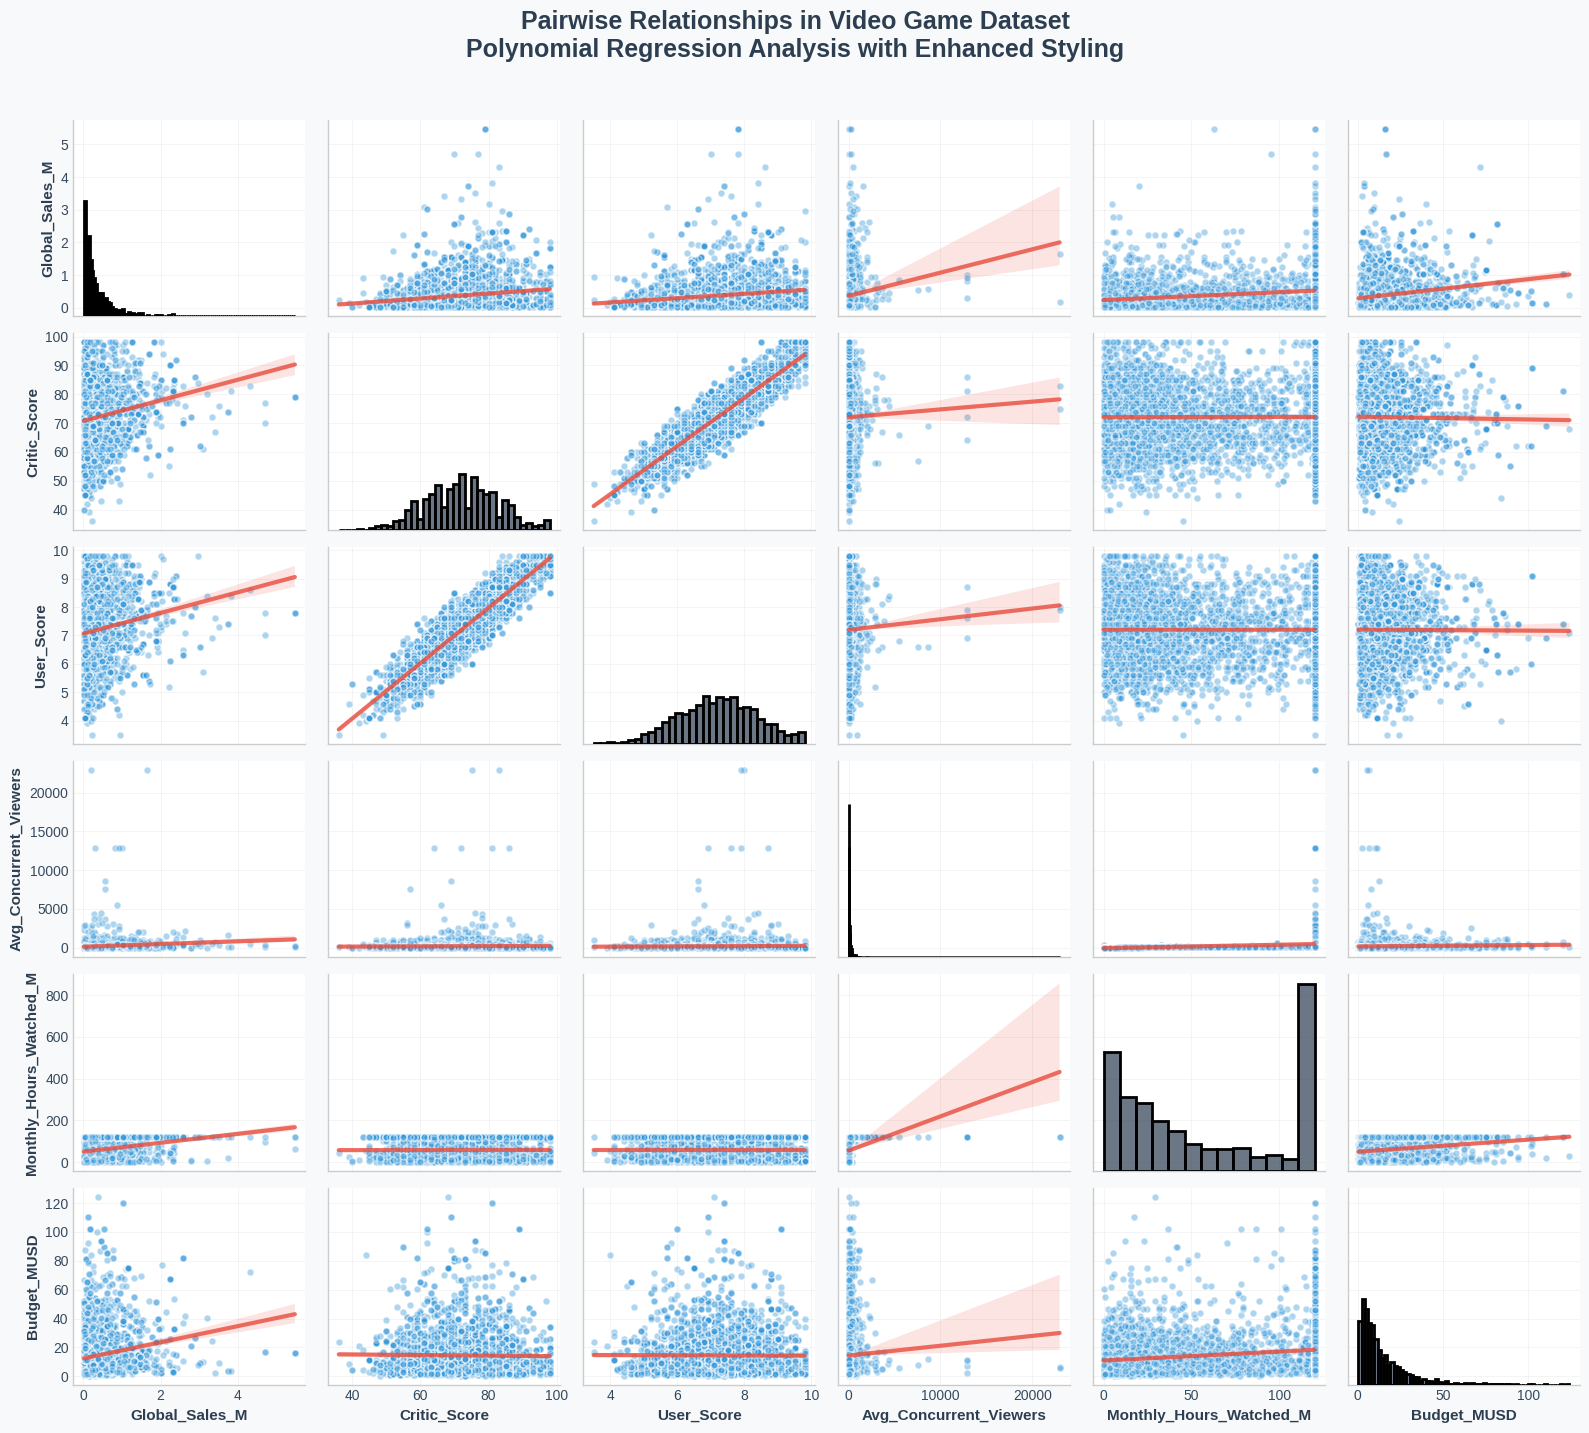


Enhanced pair plot created successfully!


In [ ]:
# Q3: Enhanced Pair Plot with Polynomial Regression Lines
print("Q3: Enhanced Pair Plot with Polynomial Regression Lines")
print("=" * 50)

# Select numerical columns for pair plot
numerical_cols = ['Global_Sales_M', 'Critic_Score', 'User_Score', 'Avg_Concurrent_Viewers',
                  'Monthly_Hours_Watched_M', 'Budget_MUSD']

print(f"Selected numerical columns: {numerical_cols}")

# Set style for better appearance
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create enhanced pair plot with polynomial regression
pair_plot = sns.pairplot(merged_df[numerical_cols],
                        kind='reg',
                        plot_kws={'scatter_kws': {'alpha': 0.4, 's': 25, 'color': '#3498db', 'edgecolors': 'white'},
                                 'line_kws': {'color': '#e74c3c', 'linewidth': 3, 'alpha': 0.8}},
                        diag_kws={'color': '#2c3e50', 'alpha': 0.7, 'linewidth': 2})

# Enhance the appearance
pair_plot.fig.set_size_inches(16, 14)
pair_plot.fig.suptitle('Pairwise Relationships in Video Game Dataset\nPolynomial Regression Analysis with Enhanced Styling',
                       y=1.02, fontsize=18, fontweight='bold', color='#2c3e50')

# Add subtle background color
pair_plot.fig.patch.set_facecolor('#f8f9fa')

# Style individual subplots
for ax in pair_plot.axes.flat:
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_facecolor('#ffffff')

    # Style tick labels
    ax.tick_params(colors='#34495e', labelsize=10)

    # Style axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, fontweight='bold', color='#2c3e50')
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

print("\nEnhanced pair plot created successfully!")



### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

Q4: Enhanced Linear Regression with Confidence Interval
Analyzing relationship between Global Sales and Critic Score


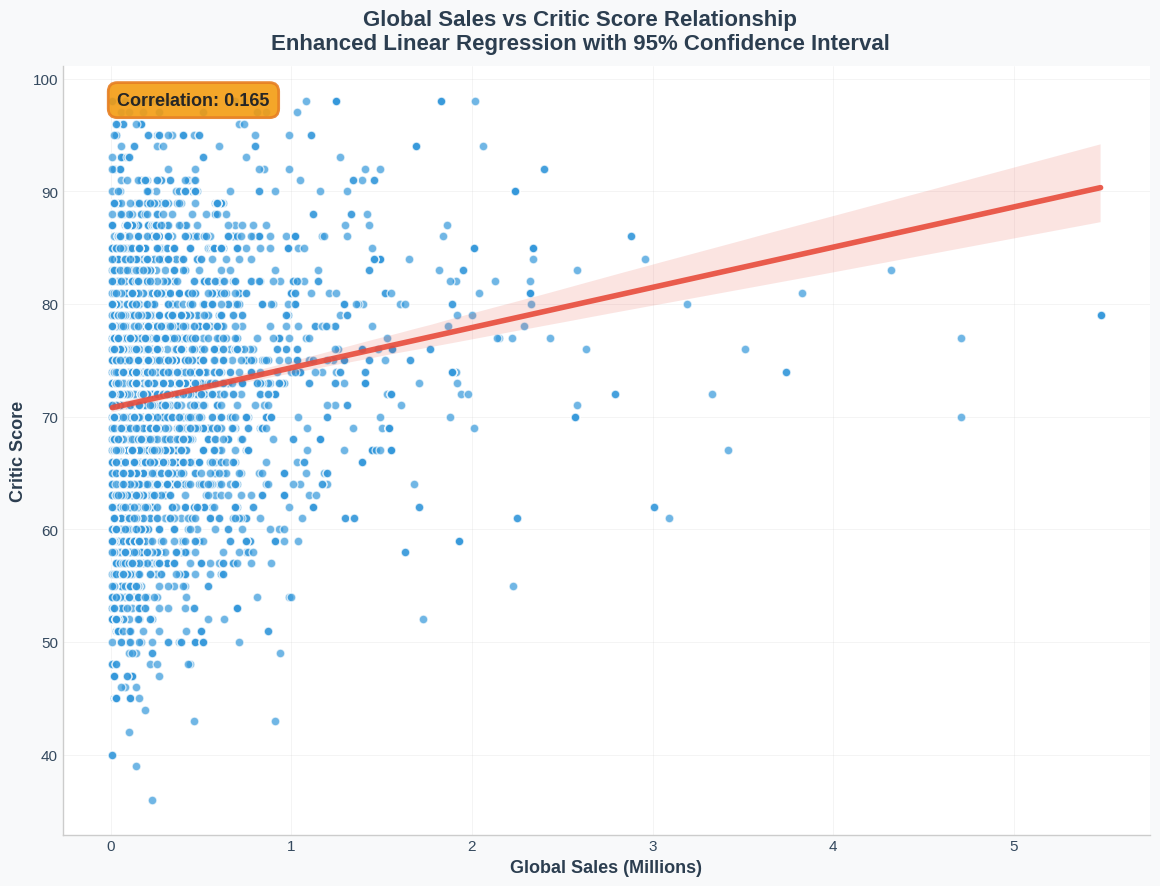


Correlation coefficient: 0.165
Enhanced linear regression plot created successfully!


In [ ]:
# Q4: Enhanced Linear Regression with Confidence Interval
print("Q4: Enhanced Linear Regression with Confidence Interval")
print("=" * 50)

# Select two features: Global Sales vs Critic Score
print("Analyzing relationship between Global Sales and Critic Score")

# Set enhanced styling
plt.style.use('seaborn-v0_8-whitegrid')

# Create enhanced lmplot for Global Sales vs Critic Score
lm_plot = sns.lmplot(data=merged_df,
                    x='Global_Sales_M',
                    y='Critic_Score',
                    height=9,
                    aspect=1.3,
                    scatter_kws={'alpha': 0.7, 's': 40, 'color': '#3498db', 'edgecolors': 'white'},
                    line_kws={'color': '#e74c3c', 'linewidth': 4, 'alpha': 0.9},
                    ci=95)

# Enhance the plot appearance
lm_plot.fig.patch.set_facecolor('#f8f9fa')

# Style the main plot
ax = lm_plot.axes[0, 0]
ax.set_facecolor('#ffffff')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Enhanced title
plt.suptitle('Global Sales vs Critic Score Relationship\nEnhanced Linear Regression with 95% Confidence Interval',
              fontsize=16, fontweight='bold', color='#2c3e50', y=0.98)

# Add correlation coefficient with enhanced styling
correlation = merged_df['Global_Sales_M'].corr(merged_df['Critic_Score'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=ax.transAxes, fontsize=13, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#f39c12", alpha=0.9,
                  edgecolor='#e67e22', linewidth=2))

# Style axis labels
ax.set_xlabel('Global Sales (Millions)', fontsize=13, fontweight='bold', color='#2c3e50')
ax.set_ylabel('Critic Score', fontsize=13, fontweight='bold', color='#2c3e50')

# Style tick labels
ax.tick_params(colors='#34495e', labelsize=11)

plt.tight_layout()
plt.show()

print(f"\nCorrelation coefficient: {correlation:.3f}")
print("Enhanced linear regression plot created successfully!")


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

Q5: Multi-Feature Relplot with Hue and Size
Creating scatter plot: Global Sales vs Monthly Hours Watched
Hue: ESRB Rating, Size: Critic Score


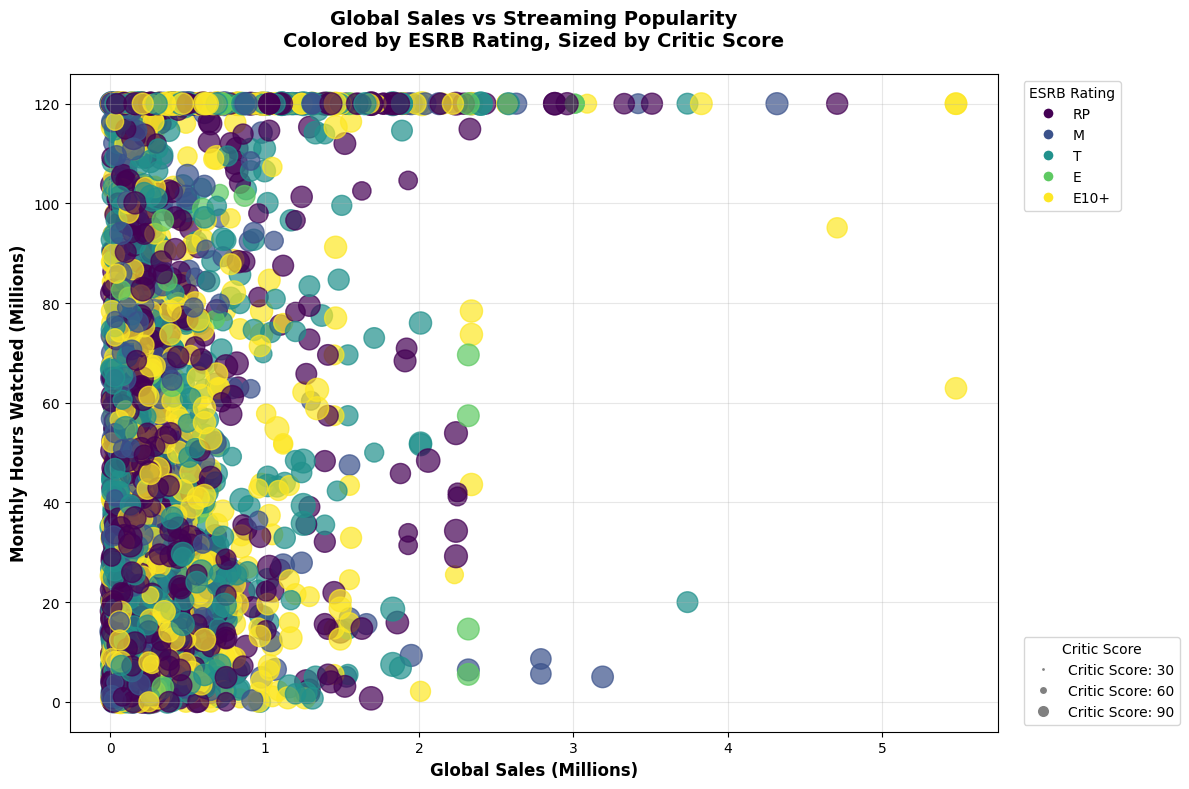

Relplot created successfully!
Number of ESRB ratings: 5
Critic Score range: 36 - 98


In [ ]:
# Q5: Multi-Feature Relplot with Hue and Size (Clean Version)
print("Q5: Multi-Feature Relplot with Hue and Size")
print("=" * 50)

# Create relplot: Global Sales vs Monthly Hours Watched
# Use ESRB Rating for hue (fewer categories) and Critic Score for size
print("Creating scatter plot: Global Sales vs Monthly Hours Watched")
print("Hue: ESRB Rating, Size: Critic Score")

# Reset style to default
plt.style.use('default')

# Create clean relplot
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with hue and size
scatter = ax.scatter(merged_df['Global_Sales_M'],
                    merged_df['Monthly_Hours_Watched_M'],
                    c=merged_df['ESRB_Rating'].astype('category').cat.codes,
                    s=merged_df['Critic_Score'] * 3,
                    alpha=0.7,
                    cmap='viridis')

# Add title
ax.set_title('Global Sales vs Streaming Popularity\nColored by ESRB Rating, Sized by Critic Score',
             fontsize=14, fontweight='bold', pad=20)

# Add axis labels
ax.set_xlabel('Global Sales (Millions)', fontsize=12, fontweight='bold')
ax.set_ylabel('Monthly Hours Watched (Millions)', fontsize=12, fontweight='bold')

# Add grid
ax.grid(True, alpha=0.3)

# Create custom legend for ESRB Rating
esrb_ratings = merged_df['ESRB_Rating'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(esrb_ratings)))
esrb_legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=colors[i], markersize=8,
                                  label=rating) for i, rating in enumerate(esrb_ratings)]

# Create custom legend for Critic Score sizes
critic_sizes = [30, 60, 90]
critic_legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor='gray', markersize=size/10,
                                     label=f'Critic Score: {size}') for size in critic_sizes]

# Combine legends
legend1 = ax.legend(handles=esrb_legend_elements, title='ESRB Rating',
                   loc='upper left', bbox_to_anchor=(1.02, 1))
legend2 = ax.legend(handles=critic_legend_elements, title='Critic Score',
                   loc='lower left', bbox_to_anchor=(1.02, 0))

# Add both legends to the plot
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

print("Relplot created successfully!")
print(f"Number of ESRB ratings: {merged_df['ESRB_Rating'].nunique()}")
print(f"Critic Score range: {merged_df['Critic_Score'].min()} - {merged_df['Critic_Score'].max()}")


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

Q6: Enhanced Small Multiples Plot
Selected platforms: ['Switch', 'PC', 'PS4', 'PS5', 'GC', 'Wii', 'XOne', 'PS2', 'XSX']


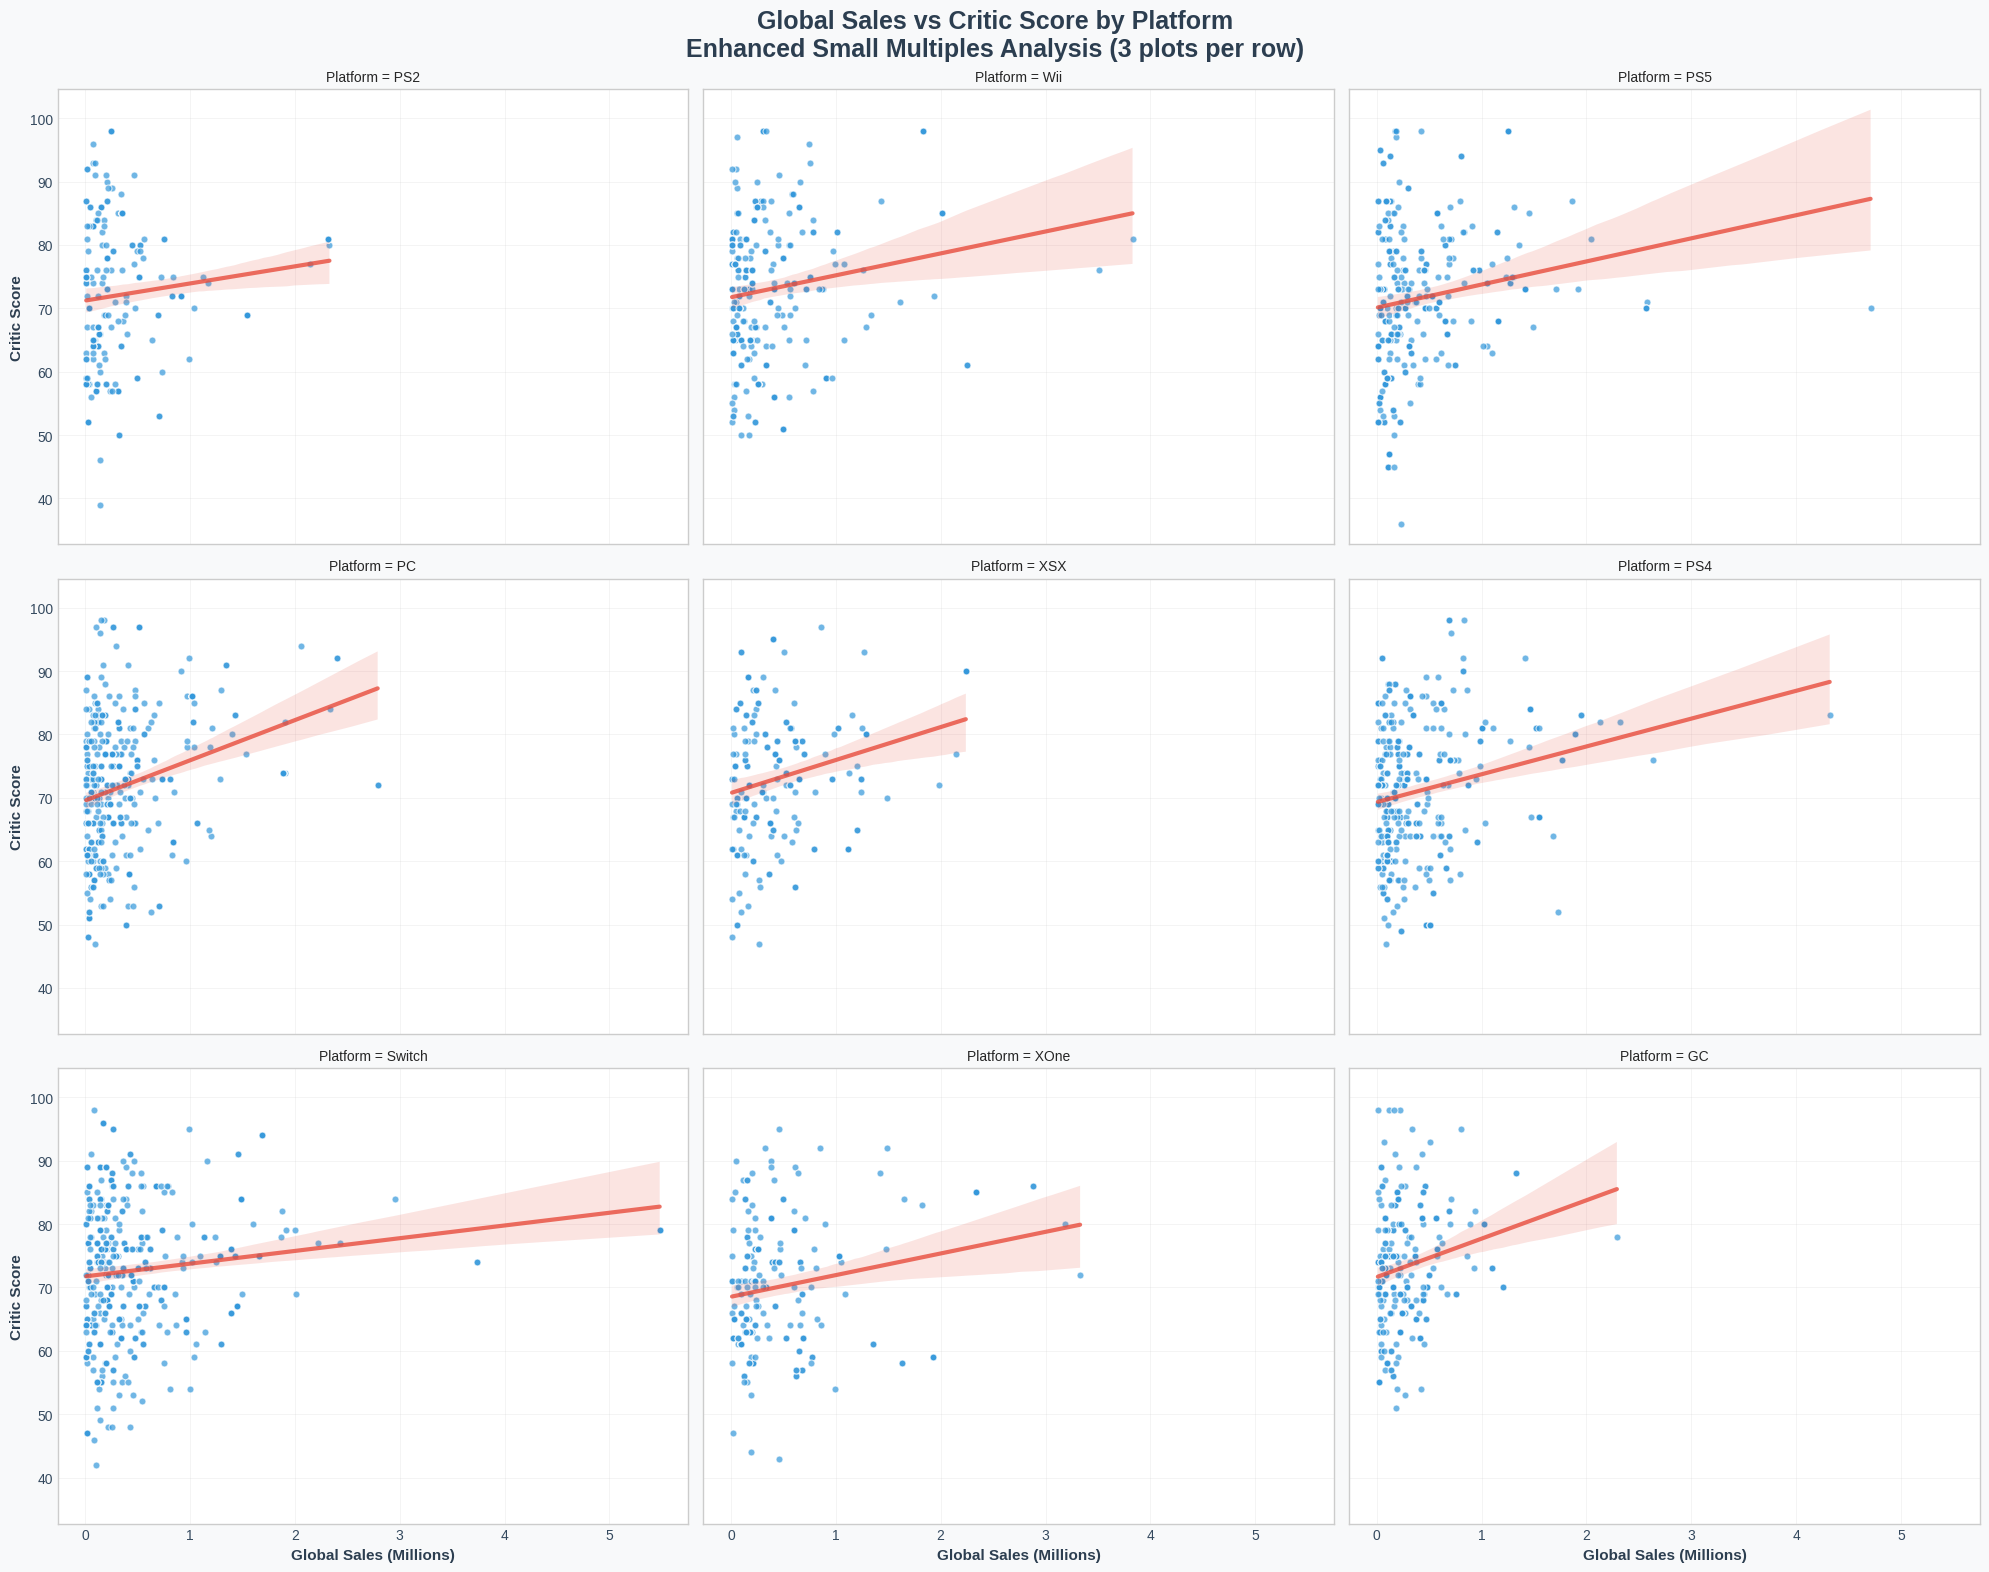

Enhanced small multiples plot created successfully!
Number of platforms analyzed: 9


In [ ]:
# Q6: Enhanced Small Multiples Plot
print("Q6: Enhanced Small Multiples Plot")
print("=" * 50)

# Create enhanced small multiples: Global Sales vs Critic Score, faceted by Platform
# Select top platforms by count for better visualization
top_platforms = merged_df['Platform'].value_counts().head(9).index
print(f"Selected platforms: {list(top_platforms)}")

# Set enhanced styling
plt.style.use('seaborn-v0_8-whitegrid')

# Create enhanced facet grid
g = sns.FacetGrid(merged_df[merged_df['Platform'].isin(top_platforms)],
                  col='Platform',
                  col_wrap=3,
                  height=6,
                  aspect=1.1,
                  despine=False)

# Map enhanced scatter plot to each facet
g.map(plt.scatter, 'Global_Sales_M', 'Critic_Score',
      s=25, alpha=0.7, color='#3498db', edgecolors='white', linewidth=0.8)

# Add enhanced regression line to each facet
g.map(sns.regplot, 'Global_Sales_M', 'Critic_Score',
      scatter=False, color='#e74c3c', line_kws={'linewidth': 3, 'alpha': 0.8})

# Enhance the overall appearance
g.fig.patch.set_facecolor('#f8f9fa')
g.fig.set_size_inches(20, 16)

# Style each subplot
for ax in g.axes.flat:
    ax.set_facecolor('#ffffff')
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.tick_params(colors='#34495e', labelsize=10)

    # Style axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, fontweight='bold', color='#2c3e50')
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, fontweight='bold', color='#2c3e50')

# Enhanced title
g.fig.suptitle('Global Sales vs Critic Score by Platform\nEnhanced Small Multiples Analysis (3 plots per row)',
               fontsize=18, fontweight='bold', color='#2c3e50', y=0.98)

# Add overall labels
g.set_axis_labels('Global Sales (Millions)', 'Critic Score')

# Adjust layout with better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("Enhanced small multiples plot created successfully!")
print(f"Number of platforms analyzed: {len(top_platforms)}")


In [ ]:
# Additional summary statistics
print("Dataset Summary Statistics")
print("=" * 50)

print("Basic statistics for key numerical columns:")
print(merged_df[numerical_cols].describe().round(2))

print("\nGenre distribution:")
print(merged_df['Genre'].value_counts())

print("\nPlatform distribution:")
print(merged_df['Platform'].value_counts())

print("\nESRB Rating distribution:")
print(merged_df['ESRB_Rating'].value_counts())

print("\nAnalysis completed successfully!")


Dataset Summary Statistics
Basic statistics for key numerical columns:
       Global_Sales_M  Critic_Score  User_Score  Avg_Concurrent_Viewers  \
count         3834.00       3834.00     3834.00                 3834.00   
mean             0.37         72.10        7.20                  185.64   
std              0.49         10.52        1.14                  757.41   
min              0.01         36.00        3.50                    0.00   
25%              0.09         65.00        6.40                   21.00   
50%              0.21         72.00        7.20                   57.00   
75%              0.48         79.00        8.00                  166.00   
max              5.48         98.00        9.80                22982.00   

       Monthly_Hours_Watched_M  Budget_MUSD  
count                  3834.00      3834.00  
mean                     57.57        14.51  
std                      45.71        14.99  
min                       0.00         0.50  
25%                    

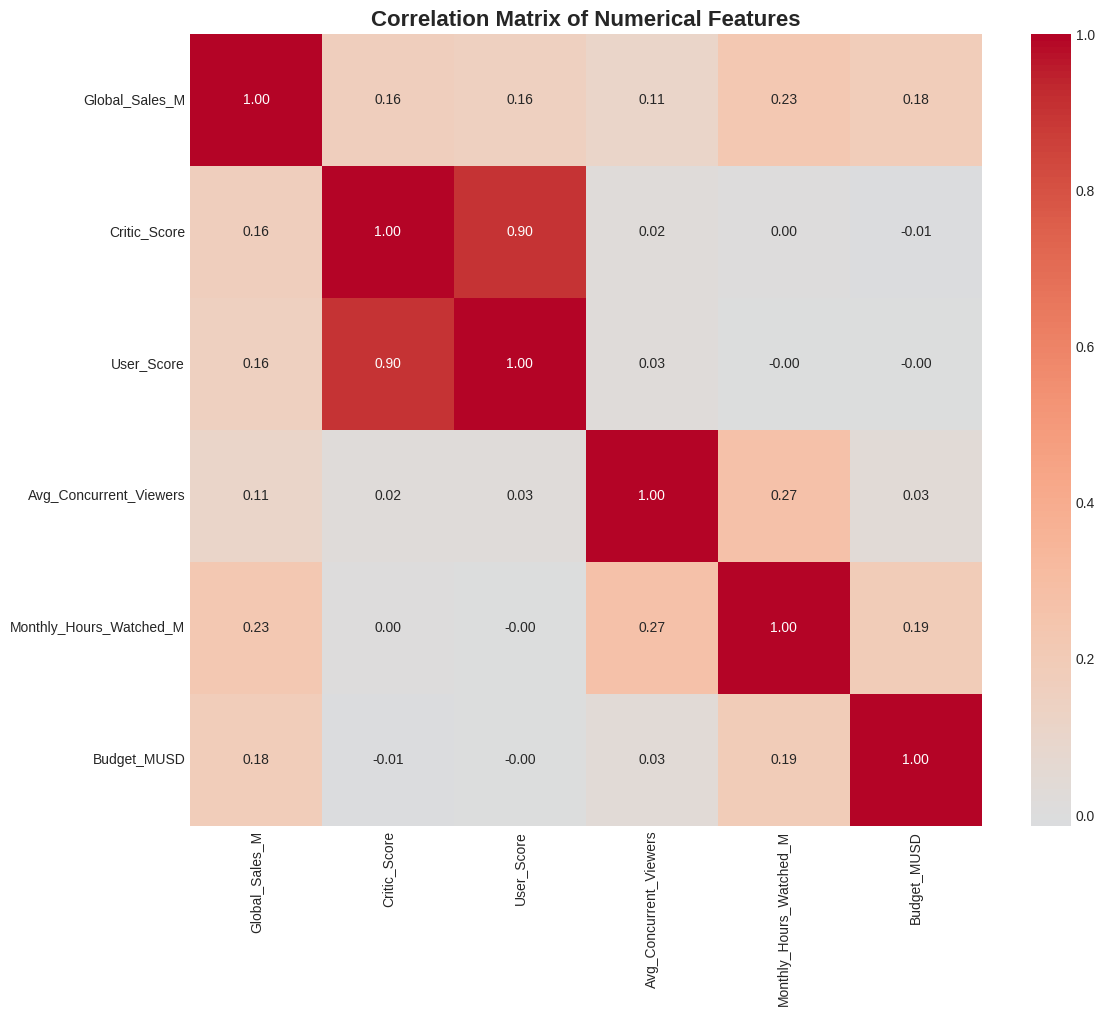

Correlation matrix created successfully!


In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = merged_df[numerical_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix created successfully!")